In [26]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"

r = requests.get(url)

In [28]:
soup = BeautifulSoup(r.content,"lxml")

In [29]:
#for row in soup('table'):
 #   print(row)

In [30]:
html_table = soup('table')[6]

country = []
year = []
total = []
men = []
women = []

# Find all the <tr> tag pairs, skip the first one, then for each.
for row in html_table.find_all('tr')[1:]:
    # Create a variable of all the <td> tag pairs in each <tr> tag pair,
    col = row.find_all('td')
    #print len(col)

In [32]:
html_table = soup('table')[6]

country = []
year = []
total = []
men = []
women = []

# Find all the <tr> tag pairs, skip the first one, then for each.
for row in html_table.find_all('tr')[1:]:
    # Create a variable of all the <td> tag pairs in each <tr> tag pair,
    col = row.find_all('td')
    if len(col) == 12:
         # Create a variable of the string inside 1st <td> tag pair,
        column_1 = col[0].string.strip()
        # and append it
        country.append(column_1)
        
        # Create a variable of the string inside 1st <td> tag pair,
        column_2 = col[1].string.strip()
        # and append it
        year.append(column_2)
        
        #col[2], col[3] do not contain any data
        
        # Create a variable of the string inside 1st <td> tag pair,
        column_5 = col[4].string.strip()
        # and append it
        total.append(column_5)
        
        #col[5], col[6] do not contain any data
        
        column_8 = col[7].string.strip()
        # and append it
        men.append(column_8)
        
        #col[8], col[9] do not contain any data
        
        column_11 = col[10].string.strip()
        # and append it
        women.append(column_11)
        
# Create a variable of the value of the columns
columns = {'country': country, 'year': year, 'total': total, 'men': men, 'women': women}

# Create a dataframe from the columns variable
#Table contain information of people's life expetancy in years
edlife_df = pd.DataFrame(columns)

In [33]:
edlife_df['men'] = edlife_df['men'].astype(int)
edlife_df['women'] = edlife_df['women'].astype(int)
edlife_df['total'] = edlife_df['total'].astype(int)
edlife_df['year'] = edlife_df['year'].astype(int)

In [34]:
edlife_df['country']

0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                                Andorra
4                                               Anguilla
5                                    Antigua and Barbuda
6                                              Argentina
7                                                Armenia
8                                                  Aruba
9                                              Australia
10                                               Austria
11                                            Azerbaijan
12                                               Bahrain
13                                            Bangladesh
14                                               Belarus
15                                               Belgium
16                                                Belize
17                             

In [35]:
edlife_df.head()

,country,men,total,women,year
0,Afghanistan,11,8,5,2004
1,Albania,11,11,11,2004
2,Algeria,13,13,13,2005
3,Andorra,11,11,12,2008
4,Anguilla,11,11,11,2008


In [36]:
for i in range(len(edlife_df)):
    edlife_df['country'][[i]] = edlife_df['country'][[i]].to_string().split(" ")[-1]
edlife_df['country'] = edlife_df['country'].astype(str)

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [37]:
edlife_df['country'] = edlife_df['country'].astype("category")

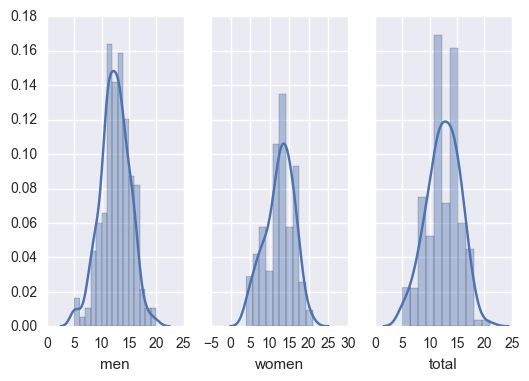

In [38]:
%matplotlib inline
fig, (a,b,c) = plt.subplots(ncols=3,sharey = True)
sns.distplot(edlife_df['men'],ax=a)
sns.distplot(edlife_df['women'],ax=b)
sns.distplot(edlife_df['total'],ax=c)

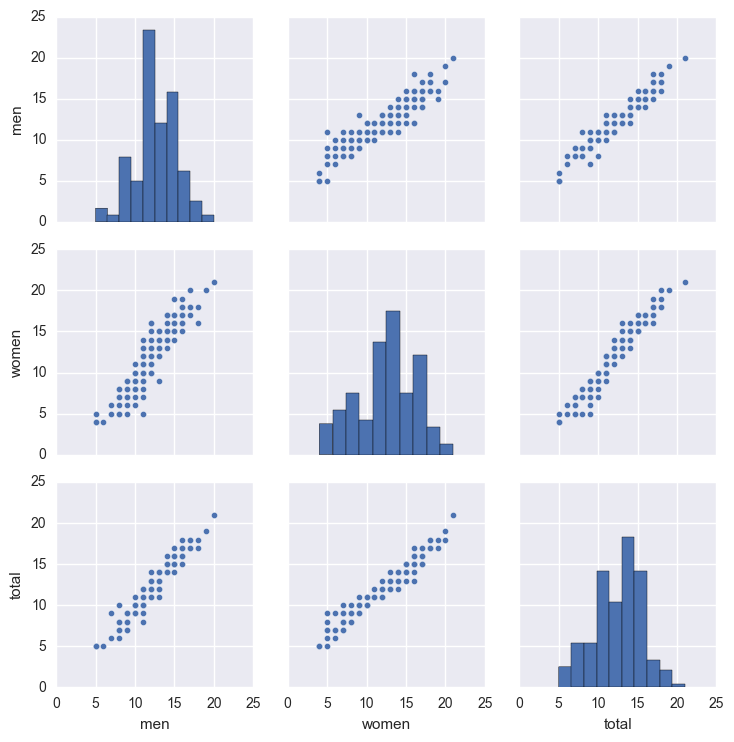

In [39]:
g = sns.pairplot(edlife_df[['men','women','total']], palette="Set2", diag_kind="hist", size=2.5)

In [21]:
edlife_df.mean()

men        12.393443
total      12.448087
women      12.513661
year     2006.672131
dtype: float64

In [22]:
edlife_df.median()

men        12.0
total      13.0
women      13.0
year     2008.0
dtype: float64

In [40]:
import csv
import sqlite3 as lite



with open('world_bank_data/GDP.csv','rU') as inputFile:
    next(inputFile)
    next(inputFile)
    next(inputFile)
    next(inputFile)
    #print next(inputFile)
    header = next(inputFile)
    real_header = (header[0:15]+header[337:-37])
    print (real_header)
    inputReader = csv.reader(inputFile)
    con = lite.connect('GDP.db')
    cur = con.cursor()
    
    #Creating Table
    cur.execute("DROP TABLE IF EXISTS gdp")
    cur.execute("CREATE TABLE gdp (country_name TEXT, _1999 INT, _2000 INT, _2001 INT, _2002 INT, _2003 INT, _2004 INT, _2005 INT, _2006 INT, _2007 INT, _2008 INT, _2009 INT, _2010 INT)")
    
    for line in inputReader:
       with con:
            cur.execute('INSERT INTO gdp (country_name, _1999, _2000, _2001, _2002, _2003, _2004, _2005, _2006, _2007, _2008, _2009, _2010) VALUES ("' + line[0] + '","' + '","'.join(line[43:-6]) + '");')
con.close()

"Country Name","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010"


In [41]:
con = lite.connect('gdp.db')
cur = con.cursor()

gdp_df = pd.read_sql_query("SELECT * FROM gdp",con)
wrong_columns = list(gdp_df.columns)
#print l
correct_columns = []
correct_columns.append(wrong_columns[0][:7])
#l2 = []
for i in range(len(wrong_columns[1:])):
    temp = wrong_columns[i+1]
    correct_columns.append(temp[1:])
#print l2
coldict = dict(zip(wrong_columns,correct_columns))
print(coldict)

{'_2000': '2000', '_2001': '2001', '_2002': '2002', '_2003': '2003', '_2004': '2004', '_2005': '2005', '_2006': '2006', '_2007': '2007', '_2008': '2008', '_2009': '2009', '_2010': '2010', '_1999': '1999', 'country_name': 'country'}


In [42]:
gdp_df = gdp_df.rename(columns = coldict)
gdp_df.head()

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,1.7228e+09,1.87345e+09,1.92026e+09,1.94109e+09,2.0213e+09,2.22828e+09,2.33101e+09,2.42147e+09,2.62373e+09,2.79196e+09,2.49893e+09,2.4677e+09
1,Andorra,1.23984e+09,1.40169e+09,1.484e+09,1.71756e+09,2.37384e+09,2.91691e+09,3.24813e+09,3.53645e+09,4.01079e+09,4.00135e+09,3.64986e+09,3.34632e+09
2,Afghanistan,,,2.46167e+09,4.12882e+09,4.58365e+09,5.28546e+09,6.27508e+09,7.0576e+09,9.84384e+09,1.01905e+10,1.24869e+10,1.59368e+10
3,Angola,6.15294e+09,9.12963e+09,8.93606e+09,1.52856e+10,1.78127e+10,2.3552e+10,3.69709e+10,5.2381e+10,6.52665e+10,8.85386e+10,7.31579e+10,8.33695e+10
4,Albania,3.41476e+09,3.63204e+09,4.06076e+09,4.43508e+09,5.74695e+09,7.31487e+09,8.15855e+09,8.99264e+09,1.0701e+10,1.28814e+10,1.20442e+10,1.1927e+10


In [43]:
edlife_df.head()

,country,men,total,women,year
0,Afghanistan,11,8,5,2004
1,Albania,11,11,11,2004
2,Algeria,13,13,13,2005
3,Andorra,11,11,12,2008
4,Anguilla,11,11,11,2008


             gdp       men     total     women    loggdp
gdp     1.000000  0.260295  0.230882  0.228041  0.581643
men     0.260295  1.000000  0.969366  0.940923  0.472743
total   0.230882  0.969366  1.000000  0.977096  0.444086
women   0.228041  0.940923  0.977096  1.000000  0.447225
loggdp  0.581643  0.472743  0.444086  0.447225  1.000000


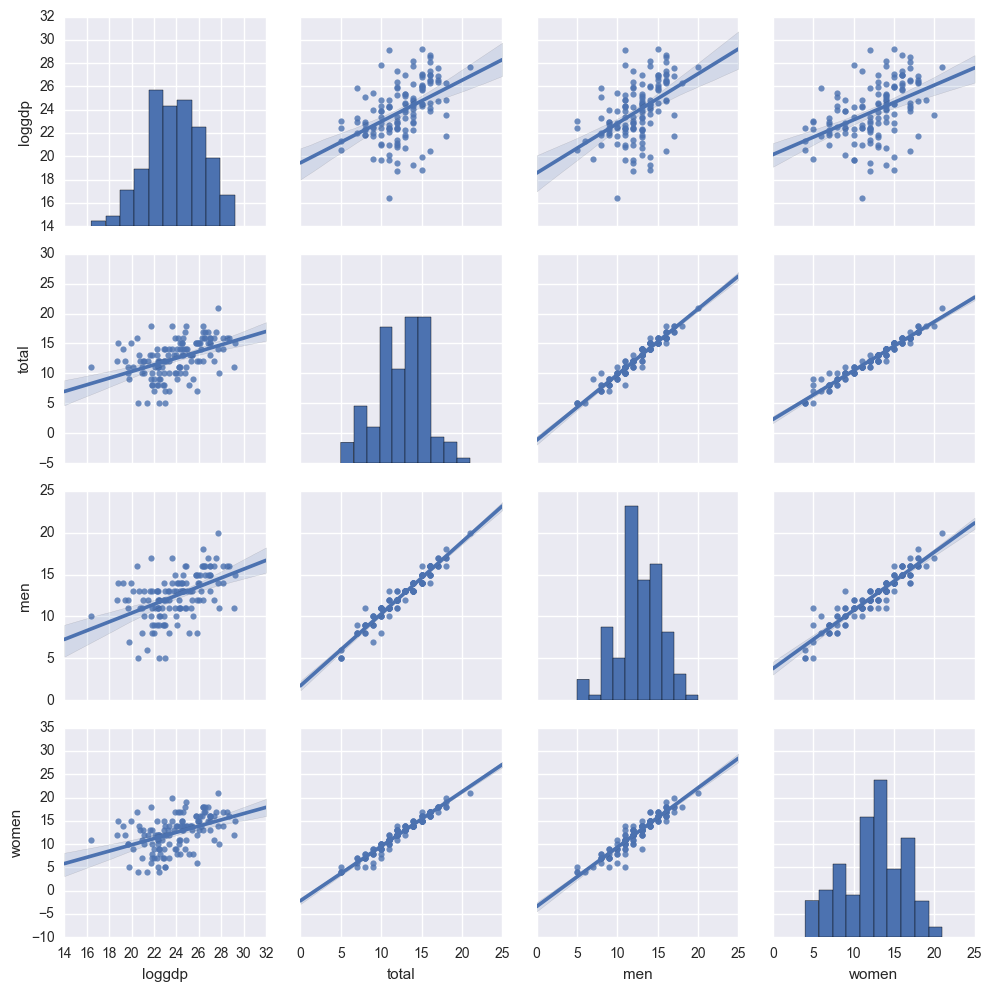

In [47]:
#Common Countries
import numpy as np

list1 = list(edlife_df['country'].tolist())
list2 = list(gdp_df['country'].tolist())

common = list(set(list1) & set(list2))
 
#Combine Datasets
gdp = []
men = []
women = []
total = []

for i in common:
    df1 = edlife_df[edlife_df['country'] == i ]
    df2 = gdp_df[gdp_df['country'] == i]
    for i in list(df1['year']):
        men.append(df1.men.iloc[0])
        women.append(df1.women.iloc[0])
        total.append(df1.total.iloc[0])
        gdp.append((df2[str(i)].iloc[0]))

df_final = pd.DataFrame({'total': total, 'men':men, 'women': women, 'gdp': gdp})
#Data Wrangling
#df_final = df_final[df_final['gdp'] != str('')]
df_final['gdp'] = df_final['gdp'].astype(float).values
df_final['loggdp'] = np.log(df_final['gdp'])

#Visualization of correlation
g = sns.pairplot(df_final[['loggdp','total','men','women']], palette="Set2", diag_kind="hist", size=2.5, kind = 'reg')
print(df_final.corr())